In [1190]:
# import packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# load train and test data sets
path_to_file = "../../data/train.csv"
train = pd.read_csv(path_to_file)

path_to_file = "../../data/test.csv"
test = pd.read_csv(path_to_file)

In [1191]:
len(test) # 1459
len(train) # 1460
1459+ 1460

2919

In [1192]:
# merge train and test for cleaning
test['SalePrice'] = None
master = train.append(pd.DataFrame(test), ignore_index=True)

In [1193]:
len(master)

2919

# Data Cleaning 

In [1194]:
# drop Id column
Ids = master.Id
master.drop(['Id'], axis = 1, inplace = True)

In [1118]:
# feature notes:
# Id - don't use for analysis, need to add back at end to submit for test

### convert to /dummy, can I collapse?
# MSSubClass (type of dwelling)
# MSZoning (zoning classification)
# MoSold (month sold in)
# LotConfig - collapse FR3 and FR2
# PoolArea - yes or no pool
# street - gravel or pave
# LotShape - collapse to irregular or not 
# LandContour - Lvl or not
# LandSlope - collapse to Gtl or Slope
# Neighborhood
# Condition1 - collapse near railroad, near street, near positive feature
# BldgType - collapse Townhouse, TwoFamCond/Duplex
# HouseStyle - collapse 1, 1.5, 2&2.5, Sfoyer, Slevel
# RoofStyle
# Exterior1st
# Exterior2nd
# MasVnrArea - yes or no
# Foundation
# CentralAir
# Electrical - collapse to SBKR or no
# Fence
# MiscFeature - shed or no shed
# SaleType - collapse
# SaleCondition
# Functional - y/n
# GarageType
# PavedDrive - y/n & partial

### cont./discrete - adjust for skew
# LotFrontage - linear feet of street connected to property
# LotArea
# total Sq ft - this is sum of 'TotalBsmtSF'  + 'GrLivArea'
# YearBuilt
# LowQualFinSF
# full baths - 'BsmtFullBath','FullBath',
# half baths - 'BsmtHalfBath','HalfBath',
# YrSold
# Fireplaces
# BedroomAbvGr
# KitchenAbvGr
# TotRmsAbvGrd
# GarageCars
# GarageArea - has some skew
# create porch sqft - 'EnclosedPorch', '3SsnPorch','ScreenPorch',
# WoodDeckSF
# OpenPorchSF

### ord. - transformations when plotted vs. y? can I collapse?
# OverlQual - materials and finish
# OveralCond - condition
# ExterQual
# ExterCond
# BsmtExposure - CHECK graph, this includes no basement. Maybe Dummy
# BsmtFinType1 - CHECK graph, this includes no basement. Maybe Dummy
# Buckets of when it was remodeled by years ago - ADD from YearRemodAdd
# HeatingQC - collapse
# KitchenQual - collapse
# GarageFinish
# GarageQual - collapse
# GarageCond - collapse 

### drop
# PoolQC - not many observations, small range with in the observations
# Alley - only ~6% have an alley at all, probably won't have much effect on price
# Utilities - all pub except one or two
# Condition2 - not many have this 
# RoofMatl - mostly all the same, probably accounted for in RoofStyle
# BsmtCond
# BsmtQual
# BsmtFinType2
# BsmtFinSF1
# BsmtFinSF2
# Heating
# FireplaceQu
# MiscVal
# GarageYrBlt
# ---
# YearRemodAdd - make into ord.
# 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', - to half and full baths
# 'TotalBsmtSF'  'GrLivArea' to total sq
# 'EnclosedPorch', '3SsnPorch','ScreenPorch', to porch sqft
######### Feat engineering
# first floor sf and second floor sf - sum these and eliminate other 
# total sq foot of house
#########

In [1195]:
# drop vars to drop
master.drop(['GarageCars','PoolQC', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtQual', 'BsmtFinType2',
            'BsmtFinSF1', 'BsmtFinSF2', 'Heating', 'FireplaceQu', 'MiscVal', 'GarageYrBlt'], axis = 1, inplace = True)

In [1196]:
# # create df with continuous and discrete variables 
contDiscVars = master[['LotFrontage', 'LotArea', 'YearBuilt', 'LowQualFinSF',
                     'YrSold', 'Fireplaces', 'BedroomAbvGr', 'KitchenAbvGr',
                     'TotRmsAbvGrd', 'GarageArea', 
                     'WoodDeckSF', 'OpenPorchSF']]

contDiscVars['totSF'] = master['TotalBsmtSF'] + master['GrLivArea']
contDiscVars['bathsF'] = master['BsmtFullBath'] + master['FullBath']
contDiscVars['bathsH'] = master['BsmtHalfBath'] + master['HalfBath']
contDiscVars['porchSF'] = master['EnclosedPorch'] + master['3SsnPorch'] + master['ScreenPorch']

# add years since remodeling variable
yearB = pd.DataFrame([i for i in master.YrSold])
remo = pd.DataFrame([i for i in master.YearRemodAdd])
BxRemo = pd.concat([yearB.reset_index(drop=True), remo], axis=1)
BxRemo.columns = ['S', 'R']

BxRemo['Y'] = BxRemo['S'] - BxRemo['R']

contDiscVars['SaleVremo'] = BxRemo['Y']



/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [1197]:
# collapse ordinal values

# collapse ordinal variables 
master.replace({'ExterQual': 'Fa'}, {'ExterQual': 'TA'}, regex=True, inplace = True)
master.replace({'ExterCond': 'Ex'}, {'ExterCond': 'Gd'}, regex=True, inplace = True)
master.replace({'ExterCond': 'Fa'}, {'ExterCond': 'TA'}, regex=True, inplace = True)
master.replace({'BsmtExposure': 'No'}, {'BsmtExposure': 'Mn'}, regex=True, inplace = True)
master.replace({'BsmtExposure': 'Av'}, {'BsmtExposure': 'Gd'}, regex=True, inplace = True)
master.replace({'HeatingQC': 'Fa'}, {'HeatingQC': 'Gd'}, regex=True, inplace = True)
master.replace({'HeatingQC': 'Gd'}, {'HeatingQC': 'TA'}, regex=True, inplace = True)
master.replace({'KitchenQual': 'Fa'}, {'KitchenQual': 'TA'}, regex=True, inplace = True)
master.replace({'KitchenQual': 'Fa'}, {'KitchenQual': 'TA'}, regex=True, inplace = True)
master.replace({'GarageQual': 'Ex'}, {'GarageQual': 'Gd'}, regex=True, inplace = True)
master.replace({'GarageQual': 'Fa'}, {'GarageQual': 'TA'}, regex=True, inplace = True)
master.replace({'GarageCond': 'Ex'}, {'GarageCond': 'Gd'}, regex=True, inplace = True)
master.replace({'GarageCond': 'Fa'}, {'GarageCond': 'TA'}, regex=True, inplace = True)


In [1198]:
# ordinal variables to ordinal
var_to_ord ={"ExterQual": {"Ex": 3, "Gd": 2, "TA": 1},
                "ExterCond": {"Gd": 3, "TA": 2, "Po": 1},
                "BsmtExposure": {"Gd": 3, "Mn": 2, np.nan: 1}, # missing means no basement
                "BsmtFinType1": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                "HeatingQC": {"Ex": 3, "TA": 2, "Po": 1},
                "KitchenQual": {"Ex": 3, "Gd": 2, "TA": 1},
                "GarageFinish": {'RFn': 3, 'Unf': 2, 'Fin': 4, np.nan: 1},
                    
                "GarageQual": {"Gd": 4, "TA": 3, "Po": 2, np.nan: 1},
                "GarageCond": {"Gd": 4, "TA": 3, "Po": 2, np.nan: 1}
            }

master.replace(var_to_ord, inplace=True)

In [1199]:
# create df of ordinal values
ordVars = master[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond"]]

In [1200]:
# collapse dummy variables

master.replace({'LogConfig': 'FR3'}, {'LogConfig': 'FR2'}, regex=True, inplace = True)
master.replace({'LogConfig': 'FR2'}, {'LogConfig': 'FR'}, regex=True, inplace = True)
master['MiscFeature'] = [1 if i == 'Shed' else 0 for i in master['MiscFeature']]
master['PoolArea'] = [0 if i == 0  else 1 for i in master['PoolArea']]
master['CentralAir'] = [0 if i =='N'  else 1 for i in master['CentralAir']]
master['Street'] = [0 if i == "Grvl"  else 1 for i in master['Street']]
master['MasVnrArea'] = [0 if i == "No"  else 1 for i in master['MasVnrArea']]

master['Alley'] = [0 if i == np.nan  else 1 for i in master['Alley']]

master.replace({'LotShape': 'IR3'}, {'LotShape': 'IR1'}, regex=True, inplace = True)
master.replace({'LotShape': 'IR2'}, {'LotShape': 'IR1'}, regex=True, inplace = True)
master.replace({'LotShape': 'IR1'}, {'LotShape': 'IR'}, regex=True, inplace = True)

master.replace({'LandContour': 'Bnk'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)
master.replace({'LandContour': 'HLS'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)
master.replace({'LandContour': 'Low'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)

master.replace({'LandSlope': 'Mod'}, {'LandSlope': 'Slp'}, regex=True, inplace = True)
master.replace({'LandSlope': 'Sev'}, {'LandSlope': 'Slp'}, regex=True, inplace = True)

master.replace({'Condition1': 'Feedr'}, {'Condition1': 'St'}, regex=True, inplace = True)
master.replace({'Condition1': 'Artery'}, {'Condition1': 'St'}, regex=True, inplace = True)
master.replace({'Condition1': 'PosN'}, {'Condition1': 'Pos'}, regex=True, inplace = True)
master.replace({'Condition1': 'PosA'}, {'Condition1': 'Pos'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRNn'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRAn'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRNe'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRAe'}, {'Condition1': 'RR'}, regex=True, inplace = True)

master.replace({'BldgType': 'TwnhsE'}, {'BldgType': 'Twnhs'}, regex=True, inplace = True)
master.replace({'BldgType': '2fmCon'}, {'BldgType': '2fam'}, regex=True, inplace = True)
master.replace({'BldgType': 'Duplex'}, {'BldgType': '2fam'}, regex=True, inplace = True)

master.replace({'HouseStyle': '1.5Fin'}, {'HouseStyle': '1.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '1.5Unf'}, {'HouseStyle': '1.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2.5Unf'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2.5Unf'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2Story'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)

master['Electrical'] = [1 if i == "SBrkr"  else 0 for i in master['Electrical']]

master.replace({'SaleType': 'CWD'}, {'SaleType': 'WD'}, regex=True, inplace = True)
master.replace({'SaleType': 'VWD'}, {'SaleType': 'WD'}, regex=True, inplace = True)
master.replace({'SaleType': 'ConLI'}, {'SaleType': 'ConLw'}, regex=True, inplace = True)
master.replace({'SaleType': 'ConLD'}, {'SaleType': 'ConLw'}, regex=True, inplace = True)     
       
master['Function'] = [1 if i == "Typ"  else 0 for i in master['Functional']]

master['PavedDrive'] = [1 if i == "Y"  else 0 for i in master['PavedDrive']]


In [1318]:
path_to_file = "../../data/train.csv"
trainnhood = pd.read_csv(path_to_file)

nhood = trainnhood.groupby('Neighborhood').mean().SalePrice
nhood = pd.DataFrame(nhood).reset_index()
nhood

dict1 = {}
for i in nhood.Neighborhood:
    if nhood[nhood.Neighborhood == i].SalePrice.values[0] >= 300000:
        #print(nhood[nhood.Neighborhood == i].SalePrice.values[0])
        dict1[i] = 6
        print(dict1)
    elif nhood[nhood.Neighborhood == i].SalePrice.values[0] < 300000 and nhood[nhood.Neighborhood == i].SalePrice.values[0] > 200000:
        dict1[i] = 5 
    elif nhood[nhood.Neighborhood == i].SalePrice.values[0] <= 200000 and nhood[nhood.Neighborhood == i].SalePrice.values[0] > 150000:
        dict1[i] = 4
    elif nhood[nhood.Neighborhood == i].SalePrice.values[0] <= 150000 and nhood[nhood.Neighborhood == i].SalePrice.values[0] > 135000:
        dict1[i] = 3
    elif nhood[nhood.Neighborhood == i].SalePrice.values[0] <= 135000 and nhood[nhood.Neighborhood == i].SalePrice.values[0]  > 120000:
        dict1[i] = 2       
    else:
        dict1[i] = 1
        

{'Blmngtn': 4, 'Blueste': 3, 'BrDale': 1, 'BrkSide': 2, 'ClearCr': 5, 'CollgCr': 4, 'Crawfor': 5, 'Edwards': 2, 'Gilbert': 4, 'IDOTRR': 1, 'MeadowV': 1, 'Mitchel': 4, 'NAmes': 3, 'NPkVill': 3, 'NWAmes': 4, 'NoRidge': 6}
{'Blmngtn': 4, 'Blueste': 3, 'BrDale': 1, 'BrkSide': 2, 'ClearCr': 5, 'CollgCr': 4, 'Crawfor': 5, 'Edwards': 2, 'Gilbert': 4, 'IDOTRR': 1, 'MeadowV': 1, 'Mitchel': 4, 'NAmes': 3, 'NPkVill': 3, 'NWAmes': 4, 'NoRidge': 6, 'NridgHt': 6}
{'Blmngtn': 4, 'Blueste': 3, 'BrDale': 1, 'BrkSide': 2, 'ClearCr': 5, 'CollgCr': 4, 'Crawfor': 5, 'Edwards': 2, 'Gilbert': 4, 'IDOTRR': 1, 'MeadowV': 1, 'Mitchel': 4, 'NAmes': 3, 'NPkVill': 3, 'NWAmes': 4, 'NoRidge': 6, 'NridgHt': 6, 'OldTown': 2, 'SWISU': 3, 'Sawyer': 3, 'SawyerW': 4, 'Somerst': 5, 'StoneBr': 6}


In [1329]:
for k,v in dict1.items():
    for i in master.Neighborhood:
        print(i)
        if i == k:
            print(v)
            master['OrdHood'] = v

CollgCr
Veenker
CollgCr
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
Sawyer
CollgCr
NAmes
BrkSide
NAmes
Sawyer
SawyerW
NAmes
NridgHt
IDOTRR
CollgCr
MeadowV
Sawyer
NridgHt
NAmes
NridgHt
NAmes
BrkSide
IDOTRR
Sawyer
CollgCr
NAmes
NridgHt
NridgHt
CollgCr
NAmes
NAmes
Edwards
NAmes
Timber
SawyerW
CollgCr
NAmes
NridgHt
Mitchel
Somerst
OldTown
Sawyer
Gilbert
BrkSide
IDOTRR
Veenker
NAmes
NAmes
Somerst
CollgCr
StoneBr
CollgCr
SawyerW
IDOTRR
NridgHt
OldTown
CollgCr
NridgHt
NAmes
CollgCr
OldTown
ClearCr
NAmes
Mitchel
Gilbert
NAmes
OldTown
MeadowV
NAmes
BrkSide
Sawyer
OldTown
NAmes
Mitchel
Somerst
NAmes
Gilbert
NoRidge
Gilbert
Somerst
IDOTRR
CollgCr
NAmes
NAmes
Crawfor
OldTown
CollgCr
Gilbert
CollgCr
Edwards
Edwards
NAmes
NWAmes
SawyerW
SawyerW
CollgCr
IDOTRR
Somerst
OldTown
OldTown
IDOTRR
NWAmes
Edwards
Gilbert
CollgCr
Crawfor
Crawfor
Somerst
Sawyer
Edwards
SawyerW
CollgCr
ClearCr
IDOTRR
NAmes
SawyerW
NWAmes
IDOTRR
NPkVill
OldTown
NAmes
NAmes
NAmes
Gilbert
NAmes
Timber
Saw

SawyerW
OldTown
NAmes
NAmes
BrkSide
NoRidge
CollgCr
NWAmes
NAmes
NAmes
Somerst
NridgHt
SWISU
StoneBr
NAmes
Gilbert
Somerst
Somerst
CollgCr
MeadowV
CollgCr
CollgCr
OldTown
NAmes
CollgCr
NoRidge
Somerst
Timber
SWISU
Edwards
BrDale
Timber
Edwards
NAmes
OldTown
Sawyer
Edwards
IDOTRR
NWAmes
OldTown
Gilbert
BrkSide
CollgCr
NAmes
NAmes
OldTown
Blmngtn
4
Timber
Timber
BrkSide
NAmes
SWISU
BrkSide
Gilbert
CollgCr
Somerst
OldTown
Crawfor
CollgCr
Mitchel
OldTown
NWAmes
CollgCr
NAmes
NAmes
SawyerW
BrkSide
Blmngtn
4
OldTown
NoRidge
NAmes
Crawfor
NWAmes
NPkVill
CollgCr
Edwards
NAmes
NAmes
NoRidge
NAmes
OldTown
NWAmes
Gilbert
NPkVill
OldTown
Gilbert
Mitchel
NAmes
NAmes
NridgHt
OldTown
NWAmes
Crawfor
CollgCr
Somerst
BrkSide
CollgCr
Sawyer
Mitchel
CollgCr
Edwards
MeadowV
NAmes
Somerst
Edwards
Mitchel
Somerst
Gilbert
NWAmes
Crawfor
NAmes
Edwards
NAmes
NAmes
Gilbert
Gilbert
StoneBr
Gilbert
Gilbert
Gilbert
Gilbert
NAmes
NAmes
BrDale
BrDale
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Nri

Gilbert
Sawyer
Crawfor
Edwards
NAmes
Mitchel
NWAmes
Mitchel
NoRidge
NAmes
OldTown
SawyerW
NAmes
CollgCr
Timber
BrDale
OldTown
BrDale
Gilbert
MeadowV
CollgCr
OldTown
BrkSide
Crawfor
Edwards
NridgHt
Edwards
BrkSide
Blmngtn
CollgCr
Edwards
NAmes
Gilbert
IDOTRR
OldTown
OldTown
ClearCr
Timber
Somerst
Mitchel
NWAmes
OldTown
ClearCr
OldTown
BrkSide
Somerst
SWISU
Sawyer
Crawfor
CollgCr
Blmngtn
NAmes
NAmes
NridgHt
SawyerW
StoneBr
NWAmes
Edwards
NridgHt
StoneBr
Sawyer
CollgCr
NridgHt
CollgCr
OldTown
NridgHt
NridgHt
OldTown
Mitchel
Sawyer
NAmes
NAmes
NWAmes
OldTown
MeadowV
MeadowV
NAmes
Gilbert
NAmes
OldTown
IDOTRR
NoRidge
BrkSide
Sawyer
NAmes
BrDale
Somerst
Edwards
Crawfor
NPkVill
OldTown
SawyerW
Somerst
OldTown
NAmes
NAmes
NridgHt
NAmes
Mitchel
Crawfor
NridgHt
NWAmes
NoRidge
CollgCr
Crawfor
OldTown
NAmes
BrkSide
Edwards
NoRidge
Somerst
NAmes
NridgHt
Edwards
Crawfor
Timber
BrkSide
NAmes
BrkSide
Gilbert
Edwards
CollgCr
NAmes
Sawyer
CollgCr
Timber
NoRidge
NWAmes
NAmes
Gilbert
NWAmes
BrkSide
Mitche

NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
BrkSide
BrkSide
OldTown
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawyer
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Edwards
Edwards
Edwards
ClearCr
Edwards
SWISU
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
SawyerW
ClearCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
C

Gilbert
NAmes
NAmes
BrDale
1
BrDale
1
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Blmngtn
Gilbert
Gilbert
NoRidge
Somerst
Somerst
Somerst
SawyerW
SawyerW
Sawyer
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
OldTown
OldTown
OldTown
ClearCr
ClearCr
SWISU
SWISU
SWISU
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Sawyer
ClearCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
SWISU
SWISU
SWISU
Crawfor
Crawfor
Crawfor
Blueste
Blueste
IDOTRR
IDOTRR
I

NridgHt
NWAmes
NoRidge
CollgCr
Crawfor
OldTown
NAmes
BrkSide
2
Edwards
NoRidge
Somerst
NAmes
NridgHt
Edwards
Crawfor
Timber
BrkSide
2
NAmes
BrkSide
2
Gilbert
Edwards
CollgCr
NAmes
Sawyer
CollgCr
Timber
NoRidge
NWAmes
NAmes
Gilbert
NWAmes
BrkSide
2
Mitchel
OldTown
Somerst
NPkVill
OldTown
NridgHt
Edwards
NridgHt
BrkSide
2
NAmes
IDOTRR
Gilbert
Blmngtn
Sawyer
Mitchel
Edwards
Edwards
NoRidge
SWISU
StoneBr
NridgHt
SawyerW
NAmes
NAmes
NAmes
Timber
Gilbert
NAmes
NAmes
SWISU
Sawyer
Somerst
OldTown
NAmes
NridgHt
Edwards
OldTown
BrkSide
2
Timber
BrkSide
2
Sawyer
ClearCr
BrkSide
2
CollgCr
NridgHt
Mitchel
CollgCr
CollgCr
StoneBr
OldTown
Blmngtn
Crawfor
Blueste
NridgHt
IDOTRR
SawyerW
Somerst
CollgCr
NAmes
CollgCr
Edwards
Crawfor
Sawyer
CollgCr
NWAmes
CollgCr
Mitchel
MeadowV
NAmes
Gilbert
NAmes
NridgHt
Timber
Edwards
NWAmes
Sawyer
Somerst
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
NridgHt
NWAmes
NAmes
OldTown
SWISU
BrkSide
2
OldTown
Edwards
Blmngtn
NridgHt
Somerst
NAmes
NWAmes
Somerst
NAmes
NAmes
E

OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
2
BrkSide
2
BrkSide
2
BrkSide
2
BrkSide
2
BrkSide
2
BrkSide
2
BrkSide
2
BrkSide
2
OldTown
BrkSide
2
BrkSide
2
OldTown
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawyer
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Edwards
Edwards
Edwards
ClearCr
Edwards
SWISU
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
SawyerW
ClearCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawf

NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Blmngtn
Gilbert
Gilbert
NoRidge
Somerst
Somerst
Somerst
SawyerW
SawyerW
Sawyer
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
OldTown
OldTown
OldTown
ClearCr
5
ClearCr
5
SWISU
SWISU
SWISU
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
5
Sawyer
ClearCr
5
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
SWISU
SWISU
SWISU
Crawfor
Crawfor
Crawfor
Blueste
Blueste
IDOTRR
IDOTRR
IDOTRR
Crawfor
Mitchel
Mitchel
Mitchel
Timber
Timber
Timber
Mit

NWAmes
OldTown
MeadowV
MeadowV
NAmes
Gilbert
NAmes
OldTown
IDOTRR
NoRidge
BrkSide
Sawyer
NAmes
BrDale
Somerst
Edwards
Crawfor
NPkVill
OldTown
SawyerW
Somerst
OldTown
NAmes
NAmes
NridgHt
NAmes
Mitchel
Crawfor
NridgHt
NWAmes
NoRidge
CollgCr
4
Crawfor
OldTown
NAmes
BrkSide
Edwards
NoRidge
Somerst
NAmes
NridgHt
Edwards
Crawfor
Timber
BrkSide
NAmes
BrkSide
Gilbert
Edwards
CollgCr
4
NAmes
Sawyer
CollgCr
4
Timber
NoRidge
NWAmes
NAmes
Gilbert
NWAmes
BrkSide
Mitchel
OldTown
Somerst
NPkVill
OldTown
NridgHt
Edwards
NridgHt
BrkSide
NAmes
IDOTRR
Gilbert
Blmngtn
Sawyer
Mitchel
Edwards
Edwards
NoRidge
SWISU
StoneBr
NridgHt
SawyerW
NAmes
NAmes
NAmes
Timber
Gilbert
NAmes
NAmes
SWISU
Sawyer
Somerst
OldTown
NAmes
NridgHt
Edwards
OldTown
BrkSide
Timber
BrkSide
Sawyer
ClearCr
BrkSide
CollgCr
4
NridgHt
Mitchel
CollgCr
4
CollgCr
4
StoneBr
OldTown
Blmngtn
Crawfor
Blueste
NridgHt
IDOTRR
SawyerW
Somerst
CollgCr
4
NAmes
CollgCr
4
Edwards
Crawfor
Sawyer
CollgCr
4
NWAmes
CollgCr
4
Mitchel
MeadowV
NAmes
Gilbert
NAm

Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Veenker
Sawyer
Sawyer
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Veenker
Veenker
Veenker
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
BrkSide
BrkSide
BrkSide
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
BrkSide
BrkSide
OldTown
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawy

IDOTRR
NAmes
Veenker
NAmes
NridgHt
Somerst
NWAmes
NPkVill
Crawfor
5
Sawyer
Sawyer
Veenker
NridgHt
CollgCr
Gilbert
Edwards
NoRidge
Mitchel
NAmes
Somerst
ClearCr
Crawfor
5
NoRidge
Mitchel
OldTown
Crawfor
5
Edwards
Timber
Crawfor
5
NoRidge
OldTown
Timber
Edwards
OldTown
NoRidge
CollgCr
Gilbert
Mitchel
Somerst
OldTown
Mitchel
Sawyer
Gilbert
Gilbert
OldTown
CollgCr
Sawyer
NAmes
CollgCr
BrkSide
CollgCr
NWAmes
SawyerW
SawyerW
CollgCr
NAmes
Somerst
SawyerW
Gilbert
Edwards
Sawyer
NAmes
Sawyer
Sawyer
Somerst
BrkSide
BrDale
NAmes
Sawyer
NAmes
NAmes
Gilbert
NAmes
Somerst
NAmes
NridgHt
NAmes
Sawyer
NAmes
NAmes
NAmes
SWISU
Crawfor
5
NridgHt
CollgCr
SawyerW
Timber
CollgCr
Somerst
NWAmes
NridgHt
Crawfor
5
NWAmes
Somerst
Mitchel
OldTown
NAmes
NAmes
NridgHt
Mitchel
Veenker
Edwards
BrkSide
NoRidge
Edwards
Gilbert
NAmes
Gilbert
NAmes
ClearCr
BrkSide
NAmes
Somerst
OldTown
Timber
Crawfor
5
NAmes
ClearCr
NWAmes
Sawyer
Edwards
Crawfor
5
NAmes
NWAmes
NWAmes
CollgCr
IDOTRR
CollgCr
Timber
CollgCr
Mitchel
SWISU
B

OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
IDOTRR
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawyer
Sawyer
Sawyer
Edwards
SWISU
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
ClearCr
Sawyer
ClearCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
ClearCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
SWISU
SWISU
SWISU
Crawfor
5
SWISU
SWISU
Crawfor
5
Crawfor
5
Crawfor
5
Crawfor
5
Crawfor
5
Crawfor
5
IDOTRR
IDOTRR
IDOTR

SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Veenker
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Veenker
Veenker
Veenker
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
IDOTRR
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
OldTown
OldTown
IDOTRR
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
Sawyer
Edwards
2
Edwards
2
Edwards
2
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Sawyer
Edwards
2
Edwards
2
Edwards
2
Edwards
2
Edwards
2
Sawyer

SWISU
ClearCr
CollgCr
NoRidge
StoneBr
Somerst
Somerst
StoneBr
NridgHt
CollgCr
NoRidge
Timber
OldTown
BrkSide
Timber
BrkSide
Edwards
Sawyer
Somerst
Timber
NWAmes
StoneBr
OldTown
CollgCr
IDOTRR
ClearCr
NridgHt
Gilbert
4
Sawyer
BrkSide
IDOTRR
StoneBr
BrkSide
Sawyer
NWAmes
OldTown
NWAmes
NoRidge
CollgCr
StoneBr
CollgCr
NAmes
Edwards
Edwards
NAmes
Crawfor
CollgCr
NAmes
IDOTRR
StoneBr
Timber
CollgCr
Sawyer
Sawyer
OldTown
NAmes
Gilbert
4
Edwards
CollgCr
OldTown
Sawyer
SawyerW
Sawyer
StoneBr
NWAmes
Gilbert
4
OldTown
NoRidge
Edwards
OldTown
Gilbert
4
CollgCr
NridgHt
NAmes
Somerst
CollgCr
Sawyer
Somerst
NoRidge
NAmes
BrkSide
Somerst
NoRidge
Veenker
Somerst
NWAmes
Mitchel
CollgCr
StoneBr
Sawyer
Edwards
Edwards
NAmes
NridgHt
Mitchel
CollgCr
Sawyer
SawyerW
Mitchel
Gilbert
4
SawyerW
CollgCr
Mitchel
OldTown
NWAmes
OldTown
SawyerW
OldTown
ClearCr
Blmngtn
Mitchel
NoRidge
Somerst
Gilbert
4
SawyerW
Sawyer
NAmes
NridgHt
SWISU
ClearCr
IDOTRR
CollgCr
NridgHt
NAmes
Somerst
NAmes
BrkSide
NAmes
OldTown
NWAmes


Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Blueste
Crawfor
Blueste
Crawfor
Crawfor
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Crawfor
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Mitchel
Mitchel
MeadowV
MeadowV
MeadowV
MeadowV
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
NAmes
NAmes
NAmes
NAmes
NAmes
Gilbert
4
Gilbert
4
Gilbert
4
Gilbert
4
Gilbert
4
StoneBr
Gilbert
4
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
NWAmes
NWAmes
NWAmes
Somerst
NWAmes
NWAmes
NAmes
NAmes
BrDale
BrDale
BrDale
BrDale
BrDale
NPkVill
NAmes
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
4
Gilbert
4
Gilbert
4
Gilbert
4
Gilbert
4
Blmngtn
Blmngtn
Blmngtn
Blmngtn
Gilbert
4
Gilbert
4
Gilbert
4
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst


SWISU
SWISU
SWISU
Crawfor
Crawfor
Crawfor
Blueste
Blueste
IDOTRR
1
IDOTRR
1
IDOTRR
1
Crawfor
Mitchel
Mitchel
Mitchel
Timber
Timber
Timber
Mitchel
Mitchel
Mitchel
MeadowV
MeadowV
MeadowV
MeadowV
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
NAmes
NAmes
Gilbert
Gilbert
Gilbert
StoneBr
StoneBr
StoneBr
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
NWAmes
NWAmes
NWAmes
NWAmes
Somerst
Somerst
Somerst
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
BrDale
BrDale
NPkVill
NPkVill
NPkVill
NPkVill
NPkVill
NPkVill
NAmes
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Gilbert
Blmngtn
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawye

Sawyer
CollgCr
NWAmes
CollgCr
Mitchel
MeadowV
1
NAmes
Gilbert
NAmes
NridgHt
Timber
Edwards
NWAmes
Sawyer
Somerst
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
NridgHt
NWAmes
NAmes
OldTown
SWISU
BrkSide
OldTown
Edwards
Blmngtn
NridgHt
Somerst
NAmes
NWAmes
Somerst
NAmes
NAmes
Edwards
NAmes
MeadowV
1
Somerst
Edwards
CollgCr
IDOTRR
NoRidge
BrDale
NAmes
Crawfor
NAmes
Edwards
NWAmes
NoRidge
NAmes
Edwards
Somerst
Gilbert
NAmes
SawyerW
Sawyer
Crawfor
CollgCr
Edwards
Veenker
Crawfor
NAmes
NPkVill
OldTown
OldTown
StoneBr
Sawyer
SawyerW
SWISU
ClearCr
CollgCr
NoRidge
StoneBr
Somerst
Somerst
StoneBr
NridgHt
CollgCr
NoRidge
Timber
OldTown
BrkSide
Timber
BrkSide
Edwards
Sawyer
Somerst
Timber
NWAmes
StoneBr
OldTown
CollgCr
IDOTRR
ClearCr
NridgHt
Gilbert
Sawyer
BrkSide
IDOTRR
StoneBr
BrkSide
Sawyer
NWAmes
OldTown
NWAmes
NoRidge
CollgCr
StoneBr
CollgCr
NAmes
Edwards
Edwards
NAmes
Crawfor
CollgCr
NAmes
IDOTRR
StoneBr
Timber
CollgCr
Sawyer
Sawyer
OldTown
NAmes
Gilbert
Edwards
CollgCr
OldTown
Sawyer
SawyerW

Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Mitchel
Mitchel
MeadowV
1
MeadowV
1
MeadowV
1
MeadowV
1
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
NAmes
NAmes
NAmes
NAmes
NAmes
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
StoneBr
Gilbert
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
NWAmes
NWAmes
NWAmes
Somerst
NWAmes
NWAmes
NAmes
NAmes
BrDale
BrDale
BrDale
BrDale
BrDale
NPkVill
NAmes
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Blmngtn
Blmngtn
Blmngtn
Blmngtn
Gilbert
Gilbert
Gilbert
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Veenker
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAme

Edwards
Gilbert
NAmes
Blmngtn
Gilbert
Gilbert
OldTown
SWISU
Mitchel
4
OldTown
SawyerW
Gilbert
BrkSide
NAmes
Sawyer
Mitchel
4
BrkSide
NAmes
NWAmes
CollgCr
Sawyer
Edwards
BrkSide
SawyerW
Crawfor
OldTown
OldTown
NAmes
Edwards
Crawfor
IDOTRR
NAmes
Veenker
NAmes
NridgHt
Somerst
NWAmes
NPkVill
Crawfor
Sawyer
Sawyer
Veenker
NridgHt
CollgCr
Gilbert
Edwards
NoRidge
Mitchel
4
NAmes
Somerst
ClearCr
Crawfor
NoRidge
Mitchel
4
OldTown
Crawfor
Edwards
Timber
Crawfor
NoRidge
OldTown
Timber
Edwards
OldTown
NoRidge
CollgCr
Gilbert
Mitchel
4
Somerst
OldTown
Mitchel
4
Sawyer
Gilbert
Gilbert
OldTown
CollgCr
Sawyer
NAmes
CollgCr
BrkSide
CollgCr
NWAmes
SawyerW
SawyerW
CollgCr
NAmes
Somerst
SawyerW
Gilbert
Edwards
Sawyer
NAmes
Sawyer
Sawyer
Somerst
BrkSide
BrDale
NAmes
Sawyer
NAmes
NAmes
Gilbert
NAmes
Somerst
NAmes
NridgHt
NAmes
Sawyer
NAmes
NAmes
NAmes
SWISU
Crawfor
NridgHt
CollgCr
SawyerW
Timber
CollgCr
Somerst
NWAmes
NridgHt
Crawfor
NWAmes
Somerst
Mitchel
4
OldTown
NAmes
NAmes
NridgHt
Mitchel
4
Veenker
Edw

Crawfor
Crawfor
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Crawfor
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Mitchel
4
Mitchel
4
MeadowV
MeadowV
MeadowV
MeadowV
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
Mitchel
4
NAmes
NAmes
NAmes
NAmes
NAmes
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
StoneBr
Gilbert
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
NWAmes
NWAmes
NWAmes
Somerst
NWAmes
NWAmes
NAmes
NAmes
BrDale
BrDale
BrDale
BrDale
BrDale
NPkVill
NAmes
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Blmngtn
Blmngtn
Blmngtn
Blmngtn
Gilbert
Gilbert
Gilbert
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sa

OldTown
NWAmes
CollgCr
NAmes
3
NAmes
3
SawyerW
BrkSide
Blmngtn
OldTown
NoRidge
NAmes
3
Crawfor
NWAmes
NPkVill
CollgCr
Edwards
NAmes
3
NAmes
3
NoRidge
NAmes
3
OldTown
NWAmes
Gilbert
NPkVill
OldTown
Gilbert
Mitchel
NAmes
3
NAmes
3
NridgHt
OldTown
NWAmes
Crawfor
CollgCr
Somerst
BrkSide
CollgCr
Sawyer
Mitchel
CollgCr
Edwards
MeadowV
NAmes
3
Somerst
Edwards
Mitchel
Somerst
Gilbert
NWAmes
Crawfor
NAmes
3
Edwards
NAmes
3
NAmes
3
Gilbert
Gilbert
StoneBr
Gilbert
Gilbert
Gilbert
Gilbert
NAmes
3
NAmes
3
BrDale
BrDale
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Blmngtn
Gilbert
Gilbert
NoRidge
Somerst
Somerst
Somerst
SawyerW
SawyerW
Sawyer
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
NAmes
3
OldTown
OldTown
OldTown
OldTown
OldTo

CollgCr
OldTown
NAmes
CollgCr
Sawyer
OldTown
OldTown
NWAmes
Gilbert
SWISU
IDOTRR
Edwards
Somerst
ClearCr
NoRidge
NAmes
Mitchel
BrkSide
Mitchel
Gilbert
NridgHt
ClearCr
SawyerW
Somerst
NridgHt
Somerst
SawyerW
Somerst
NAmes
NAmes
Sawyer
BrkSide
CollgCr
SWISU
Edwards
NWAmes
NAmes
Mitchel
IDOTRR
Somerst
NWAmes
Crawfor
Crawfor
CollgCr
CollgCr
CollgCr
OldTown
CollgCr
SawyerW
IDOTRR
Edwards
NridgHt
Gilbert
NAmes
OldTown
Timber
OldTown
Gilbert
NWAmes
Somerst
NoRidge
NWAmes
NridgHt
NridgHt
SawyerW
OldTown
NAmes
IDOTRR
Veenker
NAmes
BrkSide
IDOTRR
NAmes
NAmes
NridgHt
NridgHt
Gilbert
Timber
StoneBr
CollgCr
NWAmes
NAmes
Timber
SawyerW
NAmes
NridgHt
MeadowV
BrkSide
NAmes
NAmes
NridgHt
NridgHt
NridgHt
ClearCr
Edwards
OldTown
SWISU
CollgCr
Gilbert
MeadowV
ClearCr
NoRidge
Mitchel
BrkSide
Edwards
BrDale
NWAmes
IDOTRR
NAmes
NAmes
NAmes
NAmes
Gilbert
ClearCr
SawyerW
NAmes
CollgCr
Edwards
CollgCr
Somerst
StoneBr
Gilbert
SWISU
Somerst
CollgCr
SawyerW
ClearCr
Blmngtn
Edwards
Edwards
CollgCr
NridgHt
Edwards
M

Mitchel
MeadowV
MeadowV
MeadowV
MeadowV
Mitchel
MeadowV
Mitchel
Mitchel
Mitchel
IDOTRR
NAmes
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
StoneBr
StoneBr
StoneBr
StoneBr
Gilbert
StoneBr
StoneBr
StoneBr
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
BrDale
BrDale
NPkVill
3
NAmes
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Blmngtn
Blmngtn
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Veenker
Sawyer
Sawyer
Somerst
Somerst
Somerst
Somerst
Some

Mitchel
OldTown
NWAmes
4
OldTown
SawyerW
OldTown
ClearCr
Blmngtn
Mitchel
NoRidge
Somerst
Gilbert
SawyerW
Sawyer
NAmes
NridgHt
SWISU
ClearCr
IDOTRR
CollgCr
NridgHt
NAmes
Somerst
NAmes
BrkSide
NAmes
OldTown
NWAmes
4
CollgCr
IDOTRR
NAmes
Edwards
CollgCr
NAmes
Mitchel
ClearCr
NridgHt
CollgCr
OldTown
Gilbert
SWISU
Somerst
NridgHt
BrkSide
SawyerW
ClearCr
Somerst
NAmes
Somerst
CollgCr
NAmes
NAmes
Sawyer
OldTown
BrDale
CollgCr
Edwards
SWISU
OldTown
NAmes
NAmes
OldTown
Sawyer
SawyerW
CollgCr
ClearCr
Veenker
CollgCr
Blmngtn
Crawfor
NAmes
Sawyer
Sawyer
CollgCr
Gilbert
NWAmes
4
NWAmes
4
Crawfor
Sawyer
SawyerW
NAmes
Somerst
NAmes
Timber
Sawyer
Gilbert
SawyerW
NAmes
CollgCr
NAmes
NAmes
OldTown
Somerst
Mitchel
NridgHt
Sawyer
CollgCr
Edwards
Timber
Gilbert
SWISU
NAmes
Somerst
NAmes
Edwards
NAmes
NAmes
NAmes
Sawyer
Sawyer
Sawyer
SawyerW
NAmes
IDOTRR
SawyerW
NridgHt
Sawyer
NAmes
NAmes
Gilbert
Gilbert
Sawyer
NAmes
Somerst
Crawfor
Mitchel
Gilbert
NAmes
CollgCr
BrkSide
Crawfor
Somerst
MeadowV
IDOTRR
Edward

Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Veenker
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAmes
4
NWAmes
4
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
NAmes
OldTown
NAmes
OldTown
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
IDOTRR
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawyer
Sawyer
Sawyer
Edwards
SWISU
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
ClearCr
Sawyer
ClearCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Ed

SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Veenker
NoRidge
6
Somerst
Somerst
Somerst
Somerst
Somerst
Veenker
Veenker
Veenker
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
IDOTRR
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
OldTown
OldTown
IDOTRR
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
Sawyer
Edwards
Edwards
Edwards
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Sawyer
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
Sawy

Edwards
NAmes
Crawfor
CollgCr
NAmes
IDOTRR
StoneBr
Timber
CollgCr
Sawyer
Sawyer
OldTown
NAmes
Gilbert
Edwards
CollgCr
OldTown
Sawyer
SawyerW
Sawyer
StoneBr
NWAmes
Gilbert
OldTown
NoRidge
Edwards
OldTown
Gilbert
CollgCr
NridgHt
6
NAmes
Somerst
CollgCr
Sawyer
Somerst
NoRidge
NAmes
BrkSide
Somerst
NoRidge
Veenker
Somerst
NWAmes
Mitchel
CollgCr
StoneBr
Sawyer
Edwards
Edwards
NAmes
NridgHt
6
Mitchel
CollgCr
Sawyer
SawyerW
Mitchel
Gilbert
SawyerW
CollgCr
Mitchel
OldTown
NWAmes
OldTown
SawyerW
OldTown
ClearCr
Blmngtn
Mitchel
NoRidge
Somerst
Gilbert
SawyerW
Sawyer
NAmes
NridgHt
6
SWISU
ClearCr
IDOTRR
CollgCr
NridgHt
6
NAmes
Somerst
NAmes
BrkSide
NAmes
OldTown
NWAmes
CollgCr
IDOTRR
NAmes
Edwards
CollgCr
NAmes
Mitchel
ClearCr
NridgHt
6
CollgCr
OldTown
Gilbert
SWISU
Somerst
NridgHt
6
BrkSide
SawyerW
ClearCr
Somerst
NAmes
Somerst
CollgCr
NAmes
NAmes
Sawyer
OldTown
BrDale
CollgCr
Edwards
SWISU
OldTown
NAmes
NAmes
OldTown
Sawyer
SawyerW
CollgCr
ClearCr
Veenker
CollgCr
Blmngtn
Crawfor
NAmes
Sawyer
Sa

Gilbert
Gilbert
Gilbert
StoneBr
Gilbert
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
StoneBr
NWAmes
NWAmes
NWAmes
Somerst
NWAmes
NWAmes
NAmes
NAmes
BrDale
BrDale
BrDale
BrDale
BrDale
NPkVill
NAmes
NPkVill
NPkVill
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
NridgHt
6
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Blmngtn
Blmngtn
Blmngtn
Blmngtn
Gilbert
Gilbert
Gilbert
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Veenker
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown

SWISU
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Sawyer
ClearCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
SWISU
SWISU
SWISU
Crawfor
Crawfor
Crawfor
Blueste
Blueste
IDOTRR
IDOTRR
IDOTRR
Crawfor
Mitchel
Mitchel
Mitchel
Timber
Timber
Timber
Mitchel
Mitchel
Mitchel
MeadowV
MeadowV
MeadowV
MeadowV
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
NAmes
NAmes
Gilbert
Gilbert
Gilbert
StoneBr
StoneBr
StoneBr
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
NWAmes
NWAmes
NWAmes
NWAmes
Somerst
Somerst
Somerst
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
BrDale
BrDale
NPkVill
NPkVill
NPkVill
NPkVill
NPkVill
NPkVill
NAmes
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Gilbert
Blmngtn
Gilbert
Gilbert
Gilbert

NAmes
BrkSide
Edwards
NoRidge
Somerst
NAmes
NridgHt
Edwards
Crawfor
Timber
BrkSide
NAmes
BrkSide
Gilbert
Edwards
CollgCr
NAmes
Sawyer
CollgCr
Timber
NoRidge
NWAmes
NAmes
Gilbert
NWAmes
BrkSide
Mitchel
OldTown
Somerst
NPkVill
OldTown
NridgHt
Edwards
NridgHt
BrkSide
NAmes
IDOTRR
Gilbert
Blmngtn
Sawyer
Mitchel
Edwards
Edwards
NoRidge
SWISU
3
StoneBr
NridgHt
SawyerW
NAmes
NAmes
NAmes
Timber
Gilbert
NAmes
NAmes
SWISU
3
Sawyer
Somerst
OldTown
NAmes
NridgHt
Edwards
OldTown
BrkSide
Timber
BrkSide
Sawyer
ClearCr
BrkSide
CollgCr
NridgHt
Mitchel
CollgCr
CollgCr
StoneBr
OldTown
Blmngtn
Crawfor
Blueste
NridgHt
IDOTRR
SawyerW
Somerst
CollgCr
NAmes
CollgCr
Edwards
Crawfor
Sawyer
CollgCr
NWAmes
CollgCr
Mitchel
MeadowV
NAmes
Gilbert
NAmes
NridgHt
Timber
Edwards
NWAmes
Sawyer
Somerst
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
NridgHt
NWAmes
NAmes
OldTown
SWISU
3
BrkSide
OldTown
Edwards
Blmngtn
NridgHt
Somerst
NAmes
NWAmes
Somerst
NAmes
NAmes
Edwards
NAmes
MeadowV
Somerst
Edwards
CollgCr
IDOTRR
NoRidge

Sawyer
Sawyer
Sawyer
ClearCr
Edwards
Edwards
Edwards
ClearCr
Edwards
SWISU
3
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
SawyerW
ClearCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
3
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Crawfor
Blueste
Crawfor
Blueste
Crawfor
Crawfor
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Crawfor
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Timber
Mitchel
Mitchel
MeadowV
MeadowV
MeadowV
MeadowV
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
Mitchel
NAmes
NAmes
N

Blmngtn
Gilbert
Gilbert
NoRidge
Somerst
Somerst
Somerst
SawyerW
SawyerW
Sawyer
3
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
OldTown
OldTown
OldTown
ClearCr
ClearCr
SWISU
SWISU
SWISU
SWISU
Sawyer
3
Sawyer
3
Sawyer
3
Sawyer
3
Sawyer
3
ClearCr
Sawyer
3
ClearCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
SawyerW
CollgCr
SawyerW
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
Edwards
Edwards
Edwards
Edwards
Edwards
Edwards
SWISU
SWISU
SWISU
SWISU
Crawfor
Crawfor
Crawfor
Blueste
Blueste
IDOTRR
IDOTRR
IDOTRR
Crawfor
Mitchel
Mitchel
Mitchel
Timber
Timber
Timber
Mitchel
Mitchel
Mitchel
MeadowV
MeadowV
Meado

Crawfor
CollgCr
Blmngtn
NAmes
NAmes
NridgHt
SawyerW
4
StoneBr
NWAmes
Edwards
NridgHt
StoneBr
Sawyer
CollgCr
NridgHt
CollgCr
OldTown
NridgHt
NridgHt
OldTown
Mitchel
Sawyer
NAmes
NAmes
NWAmes
OldTown
MeadowV
MeadowV
NAmes
Gilbert
NAmes
OldTown
IDOTRR
NoRidge
BrkSide
Sawyer
NAmes
BrDale
Somerst
Edwards
Crawfor
NPkVill
OldTown
SawyerW
4
Somerst
OldTown
NAmes
NAmes
NridgHt
NAmes
Mitchel
Crawfor
NridgHt
NWAmes
NoRidge
CollgCr
Crawfor
OldTown
NAmes
BrkSide
Edwards
NoRidge
Somerst
NAmes
NridgHt
Edwards
Crawfor
Timber
BrkSide
NAmes
BrkSide
Gilbert
Edwards
CollgCr
NAmes
Sawyer
CollgCr
Timber
NoRidge
NWAmes
NAmes
Gilbert
NWAmes
BrkSide
Mitchel
OldTown
Somerst
NPkVill
OldTown
NridgHt
Edwards
NridgHt
BrkSide
NAmes
IDOTRR
Gilbert
Blmngtn
Sawyer
Mitchel
Edwards
Edwards
NoRidge
SWISU
StoneBr
NridgHt
SawyerW
4
NAmes
NAmes
NAmes
Timber
Gilbert
NAmes
NAmes
SWISU
Sawyer
Somerst
OldTown
NAmes
NridgHt
Edwards
OldTown
BrkSide
Timber
BrkSide
Sawyer
ClearCr
BrkSide
CollgCr
NridgHt
Mitchel
CollgCr
CollgCr
Stone

Veenker
Veenker
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
BrkSide
BrkSide
BrkSide
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
BrkSide
BrkSide
OldTown
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawyer
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Edwards
Edwards
Edwards
ClearCr
Edwards
SWISU
Edwards
Edwards
Edwards
Edwards
Edwards
SawyerW
4
SawyerW
4
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
CollgCr
SawyerW
4
ClearCr
CollgC

StoneBr
NAmes
Gilbert
Somerst
5
Somerst
5
CollgCr
MeadowV
CollgCr
CollgCr
OldTown
NAmes
CollgCr
NoRidge
Somerst
5
Timber
SWISU
Edwards
BrDale
Timber
Edwards
NAmes
OldTown
Sawyer
Edwards
IDOTRR
NWAmes
OldTown
Gilbert
BrkSide
CollgCr
NAmes
NAmes
OldTown
Blmngtn
Timber
Timber
BrkSide
NAmes
SWISU
BrkSide
Gilbert
CollgCr
Somerst
5
OldTown
Crawfor
CollgCr
Mitchel
OldTown
NWAmes
CollgCr
NAmes
NAmes
SawyerW
BrkSide
Blmngtn
OldTown
NoRidge
NAmes
Crawfor
NWAmes
NPkVill
CollgCr
Edwards
NAmes
NAmes
NoRidge
NAmes
OldTown
NWAmes
Gilbert
NPkVill
OldTown
Gilbert
Mitchel
NAmes
NAmes
NridgHt
OldTown
NWAmes
Crawfor
CollgCr
Somerst
5
BrkSide
CollgCr
Sawyer
Mitchel
CollgCr
Edwards
MeadowV
NAmes
Somerst
5
Edwards
Mitchel
Somerst
5
Gilbert
NWAmes
Crawfor
NAmes
Edwards
NAmes
NAmes
Gilbert
Gilbert
StoneBr
Gilbert
Gilbert
Gilbert
Gilbert
NAmes
NAmes
BrDale
BrDale
NPkVill
NPkVill
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Blmngtn
Gilbert
Gilbert
NoRidge
Somerst
5
Somerst
5
Somerst
5
SawyerW


Gilbert
Timber
StoneBr
6
CollgCr
NWAmes
NAmes
Timber
SawyerW
NAmes
NridgHt
MeadowV
BrkSide
NAmes
NAmes
NridgHt
NridgHt
NridgHt
ClearCr
Edwards
OldTown
SWISU
CollgCr
Gilbert
MeadowV
ClearCr
NoRidge
Mitchel
BrkSide
Edwards
BrDale
NWAmes
IDOTRR
NAmes
NAmes
NAmes
NAmes
Gilbert
ClearCr
SawyerW
NAmes
CollgCr
Edwards
CollgCr
Somerst
StoneBr
6
Gilbert
SWISU
Somerst
CollgCr
SawyerW
ClearCr
Blmngtn
Edwards
Edwards
CollgCr
NridgHt
Edwards
Mitchel
NAmes
BrkSide
OldTown
Edwards
CollgCr
NAmes
IDOTRR
Somerst
Veenker
CollgCr
Sawyer
NoRidge
Gilbert
Sawyer
SWISU
Crawfor
NridgHt
Somerst
Edwards
Gilbert
Somerst
OldTown
SawyerW
Gilbert
Sawyer
Crawfor
Edwards
NAmes
Mitchel
NWAmes
Mitchel
NoRidge
NAmes
OldTown
SawyerW
NAmes
CollgCr
Timber
BrDale
OldTown
BrDale
Gilbert
MeadowV
CollgCr
OldTown
BrkSide
Crawfor
Edwards
NridgHt
Edwards
BrkSide
Blmngtn
CollgCr
Edwards
NAmes
Gilbert
IDOTRR
OldTown
OldTown
ClearCr
Timber
Somerst
Mitchel
NWAmes
OldTown
ClearCr
OldTown
BrkSide
Somerst
SWISU
Sawyer
Crawfor
CollgCr
Blmn

NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
NridgHt
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Blmngtn
Blmngtn
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
Gilbert
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
NoRidge
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Veenker
Sawyer
Sawyer
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Veenker
Veenker
Veenker
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
BrkSide
BrkSide
BrkSide
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
N

IDOTRR
BrDale
NWAmes
NWAmes
OldTown
CollgCr
CollgCr
NAmes
SawyerW
CollgCr
Crawfor
CollgCr
OldTown
NWAmes
Timber
5
SawyerW
OldTown
NAmes
NAmes
BrkSide
NoRidge
CollgCr
NWAmes
NAmes
NAmes
Somerst
NridgHt
SWISU
StoneBr
NAmes
Gilbert
Somerst
Somerst
CollgCr
MeadowV
CollgCr
CollgCr
OldTown
NAmes
CollgCr
NoRidge
Somerst
Timber
5
SWISU
Edwards
BrDale
Timber
5
Edwards
NAmes
OldTown
Sawyer
Edwards
IDOTRR
NWAmes
OldTown
Gilbert
BrkSide
CollgCr
NAmes
NAmes
OldTown
Blmngtn
Timber
5
Timber
5
BrkSide
NAmes
SWISU
BrkSide
Gilbert
CollgCr
Somerst
OldTown
Crawfor
CollgCr
Mitchel
OldTown
NWAmes
CollgCr
NAmes
NAmes
SawyerW
BrkSide
Blmngtn
OldTown
NoRidge
NAmes
Crawfor
NWAmes
NPkVill
CollgCr
Edwards
NAmes
NAmes
NoRidge
NAmes
OldTown
NWAmes
Gilbert
NPkVill
OldTown
Gilbert
Mitchel
NAmes
NAmes
NridgHt
OldTown
NWAmes
Crawfor
CollgCr
Somerst
BrkSide
CollgCr
Sawyer
Mitchel
CollgCr
Edwards
MeadowV
NAmes
Somerst
Edwards
Mitchel
Somerst
Gilbert
NWAmes
Crawfor
NAmes
Edwards
NAmes
NAmes
Gilbert
Gilbert
StoneBr
Gilbert

Gilbert
ClearCr
SawyerW
NAmes
CollgCr
Edwards
CollgCr
Somerst
StoneBr
Gilbert
SWISU
Somerst
CollgCr
SawyerW
ClearCr
Blmngtn
Edwards
Edwards
CollgCr
NridgHt
Edwards
Mitchel
NAmes
BrkSide
OldTown
Edwards
CollgCr
NAmes
IDOTRR
Somerst
Veenker
5
CollgCr
Sawyer
NoRidge
Gilbert
Sawyer
SWISU
Crawfor
NridgHt
Somerst
Edwards
Gilbert
Somerst
OldTown
SawyerW
Gilbert
Sawyer
Crawfor
Edwards
NAmes
Mitchel
NWAmes
Mitchel
NoRidge
NAmes
OldTown
SawyerW
NAmes
CollgCr
Timber
BrDale
OldTown
BrDale
Gilbert
MeadowV
CollgCr
OldTown
BrkSide
Crawfor
Edwards
NridgHt
Edwards
BrkSide
Blmngtn
CollgCr
Edwards
NAmes
Gilbert
IDOTRR
OldTown
OldTown
ClearCr
Timber
Somerst
Mitchel
NWAmes
OldTown
ClearCr
OldTown
BrkSide
Somerst
SWISU
Sawyer
Crawfor
CollgCr
Blmngtn
NAmes
NAmes
NridgHt
SawyerW
StoneBr
NWAmes
Edwards
NridgHt
StoneBr
Sawyer
CollgCr
NridgHt
CollgCr
OldTown
NridgHt
NridgHt
OldTown
Mitchel
Sawyer
NAmes
NAmes
NWAmes
OldTown
MeadowV
MeadowV
NAmes
Gilbert
NAmes
OldTown
IDOTRR
NoRidge
BrkSide
Sawyer
NAmes
BrDale
Som

SawyerW
SawyerW
SawyerW
SawyerW
SawyerW
Sawyer
Sawyer
Veenker
5
Sawyer
Sawyer
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Somerst
Veenker
5
Veenker
5
Veenker
5
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NWAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
BrkSide
BrkSide
BrkSide
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
OldTown
OldTown
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
NAmes
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
OldTown
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
BrkSide
OldTown
BrkSide
BrkSide
OldTown
OldTown
OldTown
IDOTRR
IDOTRR
IDOTRR
IDOTRR
IDOTRR
Sawyer
SWISU
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
Sawyer
ClearCr
Edwards
Edward

In [1327]:
master

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Function,OrdHood
0,60,RL,65.0,8450,1,1,Reg,Lvl,Inside,Gtl,...,0,No,0,2,2008,WD,Normal,208500,1,5
1,20,RL,80.0,9600,1,1,Reg,Lvl,FR2,Gtl,...,0,No,0,5,2007,WD,Normal,181500,1,5
2,60,RL,68.0,11250,1,1,IR,Lvl,Inside,Gtl,...,0,No,0,9,2008,WD,Normal,223500,1,5
3,70,RL,60.0,9550,1,1,IR,Lvl,Corner,Gtl,...,0,No,0,2,2006,WD,Abnorml,140000,1,5
4,60,RL,84.0,14260,1,1,IR,Lvl,FR2,Gtl,...,0,No,0,12,2008,WD,Normal,250000,1,5
5,50,RL,85.0,14115,1,1,IR,Lvl,Inside,Gtl,...,0,MnPrv,1,10,2009,WD,Normal,143000,1,5
6,20,RL,75.0,10084,1,1,Reg,Lvl,Inside,Gtl,...,0,No,0,8,2007,WD,Normal,307000,1,5
7,60,RL,NaN,10382,1,1,IR,Lvl,Corner,Gtl,...,0,No,1,11,2009,WD,Normal,200000,1,5
8,50,RM,51.0,6120,1,1,Reg,Lvl,Inside,Gtl,...,0,No,0,4,2008,WD,Abnorml,129900,0,5
9,190,RL,50.0,7420,1,1,Reg,Lvl,Corner,Gtl,...,0,No,0,1,2008,WD,Normal,118000,1,5


In [1319]:
dict1

{'Blmngtn': 4,
 'Blueste': 3,
 'BrDale': 1,
 'BrkSide': 2,
 'ClearCr': 5,
 'CollgCr': 4,
 'Crawfor': 5,
 'Edwards': 2,
 'Gilbert': 4,
 'IDOTRR': 1,
 'MeadowV': 1,
 'Mitchel': 4,
 'NAmes': 3,
 'NPkVill': 3,
 'NWAmes': 4,
 'NoRidge': 6,
 'NridgHt': 6,
 'OldTown': 2,
 'SWISU': 3,
 'Sawyer': 3,
 'SawyerW': 4,
 'Somerst': 5,
 'StoneBr': 6,
 'Timber': 5,
 'Veenker': 5}

In [1312]:
nhood[nhood.Neighborhood == 'Blueste'].SalePrice.values[0]
#nhood

137500.0

In [1280]:
# create dummy list
dummyList = ['Alley','MSSubClass', 'MSZoning', 'MoSold', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Fence', 'SaleCondition', 'GarageType', 'LotConfig', 'MiscFeature', 'PoolArea', 'Street', 'CentralAir', 'MasVnrArea', 'LotShape', 'LandContour','LandSlope', 'Condition1', 'BldgType','HouseStyle','SaleType','Functional','PavedDrive']


In [1203]:
# # get rid of dummy missing values
dummies = master[dummyList]


dummy_na_list = ['Fence', 'GarageType']

def zeroNAs(x):
    for i in x:
        master[i].fillna("No",inplace=True)


zeroNAs(dummy_na_list)
dummies.isnull().sum().sort_values(ascending = False)

MSZoning         4
Functional       2
SaleType         1
Exterior1st      1
Exterior2nd      1
PavedDrive       0
GarageType       0
MSSubClass       0
MoSold           0
Neighborhood     0
RoofStyle        0
Foundation       0
Fence            0
SaleCondition    0
MiscFeature      0
LotConfig        0
PoolArea         0
Street           0
CentralAir       0
MasVnrArea       0
LotShape         0
LandContour      0
LandSlope        0
Condition1       0
BldgType         0
HouseStyle       0
Alley            0
dtype: int64

# Imputing Missing Data

In [1204]:
# class to impute missing data for dummy variables based on most frequent value 
# DO WE WANT TO DO KNN FOR THIS?

from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean',filler='NA'):
        self.strategy = strategy
        self.fill = filler

    def fit(self, X, y=None):
        if self.strategy in ['mean','median']:
            if not all(X.dtypes == np.number):
                raise ValueError('dtypes mismatch np.number dtype is \
                                 required for '+ self.strategy)
        if self.strategy == 'mean':
            self.fill = X.mean()
        elif self.strategy == 'median':
            self.fill = X.median()
        elif self.strategy == 'mode':
            self.fill = X.mode().iloc[0]
        elif self.strategy == 'fill':
            if type(self.fill) is list and type(X) is pd.DataFrame:
                self.fill = dict([(cname, v) for cname,v in zip(X.columns, self.fill)])
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [1205]:
imputedDummies = CustomImputer(strategy='mode').fit_transform(dummies)

In [1206]:
imputedDummies.isnull().sum().sort_values(ascending = False)

PavedDrive       0
LotConfig        0
MSSubClass       0
MSZoning         0
MoSold           0
Neighborhood     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
Foundation       0
Fence            0
SaleCondition    0
GarageType       0
MiscFeature      0
Functional       0
PoolArea         0
Street           0
CentralAir       0
MasVnrArea       0
LotShape         0
LandContour      0
LandSlope        0
Condition1       0
BldgType         0
HouseStyle       0
SaleType         0
Alley            0
dtype: int64

In [1207]:
# function to dummify variables
def dummify(x):
    dummy = pd.DataFrame([])
    for i in x:
        dummylist = pd.get_dummies(i, prefix = str(i.name), prefix_sep= '_')
        dummylist = dummylist.drop(str(i.name) + '_' + str(i[0]), axis = 1)   
        dummy = pd.concat([dummy, dummylist], axis =1)
    return dummy

In [1208]:
# dummify dummyList

dummyList = [imputedDummies['MSSubClass'], imputedDummies['MSZoning'], imputedDummies['MoSold'], imputedDummies['Neighborhood'], imputedDummies['RoofStyle'], imputedDummies['Exterior1st'], imputedDummies['Exterior2nd'], imputedDummies['Foundation'], imputedDummies['Fence'], imputedDummies['SaleCondition'], imputedDummies['GarageType'], imputedDummies['LotConfig'], imputedDummies['MiscFeature'], imputedDummies['PoolArea'], imputedDummies['Street'], imputedDummies['CentralAir'], imputedDummies['MasVnrArea'], imputedDummies['LotShape'], imputedDummies['LandContour'],imputedDummies['LandSlope'], imputedDummies['Condition1'], imputedDummies['BldgType'],imputedDummies['HouseStyle'],imputedDummies['SaleType'],imputedDummies['Functional'],imputedDummies['PavedDrive']]
dummyFrame = dummify(dummyList)

In [1209]:
# ordinal missing data
ordVars.isnull().sum().sort_values(ascending = False)

KitchenQual     1
GarageCond      0
GarageQual      0
GarageFinish    0
HeatingQC       0
BsmtFinType1    0
BsmtExposure    0
ExterCond       0
ExterQual       0
OverallCond     0
OverallQual     0
dtype: int64

In [1210]:
imputedOrdVars = CustomImputer(strategy='mode').fit_transform(ordVars)

In [1211]:
# continuous missing data
contDiscVars.isnull().sum().sort_values(ascending = False)

LotFrontage     486
bathsH            2
bathsF            2
totSF             1
GarageArea        1
Fireplaces        0
LotArea           0
YearBuilt         0
LowQualFinSF      0
YrSold            0
SaleVremo         0
BedroomAbvGr      0
KitchenAbvGr      0
porchSF           0
WoodDeckSF        0
OpenPorchSF       0
TotRmsAbvGrd      0
dtype: int64

In [1212]:
cont_na_list = ['LotFrontage']

def zeroNAs2(x):
    for i in x:
        contDiscVars[i].fillna(0,inplace=True)


zeroNAs2(cont_na_list)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [1213]:
contDiscVars.isnull().sum().sort_values(ascending = False)

bathsH          2
bathsF          2
totSF           1
GarageArea      1
SaleVremo       0
Fireplaces      0
LotArea         0
YearBuilt       0
LowQualFinSF    0
YrSold          0
TotRmsAbvGrd    0
BedroomAbvGr    0
KitchenAbvGr    0
porchSF         0
WoodDeckSF      0
OpenPorchSF     0
LotFrontage     0
dtype: int64

In [1214]:
imputedContDiscVars = CustomImputer(strategy='mode').fit_transform(contDiscVars)
imputedContDiscVars.isnull().sum().sort_values(ascending = False)

SaleVremo       0
KitchenAbvGr    0
LotArea         0
YearBuilt       0
LowQualFinSF    0
YrSold          0
Fireplaces      0
BedroomAbvGr    0
TotRmsAbvGrd    0
porchSF         0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
totSF           0
bathsF          0
bathsH          0
LotFrontage     0
dtype: int64

In [1215]:
len(imputedContDiscVars)

2919

# Outliers

In [1141]:
# see outliers in training set of continuous variables
Cont = pd.concat([imputedContDiscVars, master.SalePrice], axis = 1)
trainCont = Cont[Cont.SalePrice.notnull()]
testCont = Cont[Cont.SalePrice.isnull()]

# training set for ordinals and dummys
Ord = pd.concat([imputedOrdVars, master.SalePrice], axis = 1)
trainOrd = Ord[Ord.SalePrice.notnull()]
testOrd = Ord[Ord.SalePrice.isnull()]
trainOrd.drop(['SalePrice'], axis =1, inplace = True)
testOrd.drop(['SalePrice'], axis =1, inplace = True)

Dum = pd.concat([dummyFrame, master.SalePrice], axis = 1)
trainDum = Dum[Dum.SalePrice.notnull()]
testDum = Dum[Dum.SalePrice.isnull()]
trainDum.drop(['SalePrice'], axis =1, inplace = True)
testDum.drop(['SalePrice'], axis =1, inplace = True)


/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

In [1142]:
len(master)

2919

In [1143]:
# function to find outliers > 4x SD
def cutOutlier(x):
    cutOutliers = pd.DataFrame([])
    for i in x:
        emptyList = []
        m = np.mean(x[i])
        sd = np.std(x[i])
        for j in x[i]:
            if np.abs(j)< 6*np.abs(sd):
                emptyList.append(j)
            else:
                emptyList.append("Dropped")
        cutOutliers[i] = pd.Series(emptyList)
    
    return cutOutliers
    

In [1144]:
noOutliersCont = cutOutlier(trainCont)

In [1145]:
# take LotArea, totSF, bathsF, SalePrice
noOutliers = noOutliersCont[['SalePrice', 'LotArea', 'totSF', 'bathsF']]

In [1146]:
# drop cols from original trainCont df
trainCont = trainCont.drop(['SalePrice', 'LotArea', 'totSF', 'bathsF'], axis =1)

In [1147]:
# join cont cols with dropped NAs to other train columns
merge = pd.concat([trainCont, noOutliers, trainDum, trainOrd], axis =1)

In [1148]:
# list of rows to drop
drop = list(merge[merge.SalePrice == "Dropped"].index) + list(merge[merge.LotArea == "Dropped"].index) + list(merge[merge.totSF == "Dropped"].index) + list(merge[merge.bathsF == "Dropped"].index)

In [1149]:
# drop index with NAs
merge.drop(drop, inplace = True)

# Transformations

In [1150]:
# test data
mergeTest = pd.concat([testCont, testDum, testOrd], axis =1)

In [1151]:
len(mergeTest)

1459

In [1152]:
# recombine test and train as merged
merged = merge.append(mergeTest)

#Renaming MiscFeatures as "Shed"
merged.rename(columns={'MiscFeature':'Shed'}, inplace=True)

#Renaming PoolArea as "Pool" 
merged.rename(columns={"PoolArea":"Pool"}, inplace=True)

In [1153]:
# apply transformations
merged.LotArea = [i**(1/2) for i in merged.LotArea]
merged.OpenPorchSF = [i**(1/2) for i in merged.OpenPorchSF]
merged.totSF = [i**(2) for i in merged.totSF]
merged.OverallQual = [i**(2) for i in merged.OverallQual]

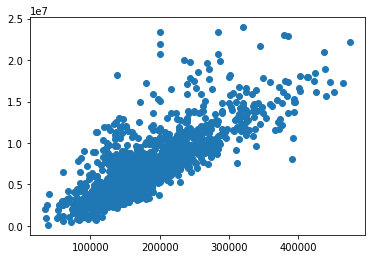

In [1154]:
test = [i**(1) for i in merged.totSF]
plt.scatter(merged.SalePrice, test)

In [1155]:
# separate train and test

In [1156]:
train = merged[merged.SalePrice.notnull()]
test = merged[merged.SalePrice.isnull()]
test.drop(['SalePrice'], axis =1, inplace = True)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Ridge

In [1157]:
train = train.set_index('SalePrice').reset_index()

In [1158]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

X = train.iloc[:, 1:].values
y = train.iloc[:, 0]

import random
from sklearn.cross_validation import train_test_split
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [1159]:
X_train

array([[3, 0, 0, ..., 2.0, 0, 4730625.0],
       [3, 0, 0, ..., 0.0, 0, 9872164.0],
       [3, 0, 0, ..., 0.0, 0, 9048064.0],
       ...,
       [2, 0, 1, ..., 1.0, 0, 5712100.0],
       [1, 0, 0, ..., 1.0, 0, 13162384.0],
       [3, 0, 0, ..., 1.0, 0, 6081156.0]], dtype=object)

In [1160]:
X1_train = pd.DataFrame(X_train)
X1_train.columns = [list(train.columns)[:-1]]

y1_train = pd.Series(y_train)

X1_test = pd.DataFrame(X_test)
X1_test.columns = [list(train.columns)[:-1]]

In [1161]:
predictors=[i for [i] in list(X1_train.columns)]

In [1165]:
from sklearn import linear_model
alpha_ridge1 = 10**np.linspace(5, -2, 100)
ridge1= linear_model.RidgeCV(alphas=alpha_ridge1, cv=20).fit(X1_train,np.ravel(y1_train))

ridgeCoef1 = pd.DataFrame(data=ridge1.coef_, index = predictors).reset_index()

In [1163]:
y_pred = ridge1.predict(X1_test)

In [1164]:
ridge1.score(X_train, y_train)

0.9245493222181221

In [1166]:
ridge1.alpha_

10.974987654930567

In [1167]:
import numpy as np

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [1168]:
hyp = y_pred
targ = y_test
rmsle(hyp, targ)

0.11965053338043921

In [1169]:
#0.11987515240801667
len(train)
len(test)

1459

In [1170]:
train.to_csv('bg_train.csv', index = False)
test.to_csv('bg_test.csv', index = False)

# Lasso

In [1171]:
alpha_lasso1 = alpha_ridge1
lasso = linear_model.LassoCV(n_alphas=100, alphas=alphas_lasso, cv=20, random_state=0, max_iter=500000).fit(X1_train,np.ravel(y1_train))
lasCoef2 = pd.DataFrame(data=lasso.coef_, index = predictors).reset_index()


In [1172]:
y_predL = lasso.predict(X1_test)

In [1173]:
lasso.score(X_train, y_train)
lasso.alpha_

65.79332246575683

In [1174]:
hyp = y_predL
targ = y_test
rmsle(hyp, targ)
#0.11799402529405807

0.11767802894829466

# Elastic Net

In [1175]:
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]

elasticNet = linear_model.ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, alphas=alpha_lasso1, fit_intercept=True, normalize=True, precompute='auto', max_iter=500000, tol=0.0001, cv=20, copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=0, selection = 'cyclic').fit(X1_train,np.ravel(y1_train))



In [1176]:
y_predE = elasticNet.predict(X1_test)

In [1177]:
hyp = y_predE
targ = y_test
rmsle(hyp, targ)

0.11654835649050321

In [1178]:
elasticNet.l1_ratio_

1.0

# Test Predictions

In [943]:
X2_train = pd.DataFrame(X)
X2_train.columns = [list(train.columns)[1:]]

y2_train = pd.Series(y)

X2_test = test
# X1_test.columns = [list(train.columns)[:-1]]

In [946]:
len(X2_test)

1459

In [947]:
elasticNet = linear_model.ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, alphas=alpha_lasso1, fit_intercept=True, normalize=True, precompute='auto', max_iter=500000, tol=0.0001, cv=20, copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=0, selection = 'cyclic').fit(X2_train,np.ravel(y2_train))

In [1003]:
lasso = linear_model.LassoCV(n_alphas=100, alphas=alphas_lasso, cv=20, random_state=0, max_iter=500000).fit(X2_train,np.ravel(y2_train))

In [1082]:
lasso.alpha_

57.2236765935022

In [948]:
y_predE2 = elasticNet.predict(X2_test)

In [1004]:
y_predL2 = lasso.predict(X2_test)

In [1005]:
SalePrice = pd.DataFrame(y_predL2)
SalePrice.columns = ['SalePrice']
#SalePrice

In [1006]:
path_to_file = "../../data/test.csv"
testFinal = pd.read_csv(path_to_file)

In [1007]:
testFinal = pd.concat([testFinal, SalePrice], axis =1)
#testFinal.set_index(['Id'], inplace = True)

In [1008]:
testResults = testFinal[['Id','SalePrice']]

In [1009]:
testResults.to_csv('testResultsL.csv', index = False)

# Notes

In [ ]:
# collapse months to seasons
# collapse neighborhoods by price